In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as st
import os

In [2]:
#Load data into df from csv

city_data_df=pd.read_csv("Resources\city_data.csv")
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
path_ride=os.path.join("Resources","ride_data.csv")
#ride_data_df=pd.read_csv("Resources\ride_data.csv")
ride_data_df=pd.read_csv(path_ride)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [4]:
#get all rows from city_data_df that are not null
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
#get the datatypes
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
#get unique values from the type column
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
sum(city_data_df["type"]=="Urban")

66

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
#get all null values from ride_data_df 

ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
ride_data_df.dtypes


city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [14]:
#merge both data frames
pyber_data_df=pd.merge(ride_data_df,city_data_df,how="left",on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#Create 3 different df for each city type(urban, rural, suburban)

urban_cities_df=pyber_data_df[pyber_data_df['type']=="Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [16]:
rural_cities_df=pyber_data_df[pyber_data_df['type']=="Rural"]

subarban_cities_df=pyber_data_df[pyber_data_df['type']=="Suburban"]
subarban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [17]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [18]:
#get average fare per city(y axis)

urban_average_fare=urban_cities_df.groupby('city').mean()['fare']
rural_average_fare=rural_cities_df.groupby('city').mean()['fare']
subarban_average_fare=subarban_cities_df.groupby('city').mean()['fare']
rural_average_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

In [19]:
#total no of rides per city(X axis)
urban_ride_count=urban_cities_df.groupby('city').count()["ride_id"]
rural_ride_count=rural_cities_df.groupby('city').count()["ride_id"]
subarban_ride_count=subarban_cities_df.groupby('city').count()["ride_id"]

In [20]:
#average no of drivers per city (size of markers)

urban_average_drivers=urban_cities_df.groupby('city').mean()['driver_count']
rural_average_drivers=rural_cities_df.groupby('city').mean()['driver_count']
subarban_average_drivers=subarban_cities_df.groupby('city').mean()['driver_count']
subarban_average_drivers.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

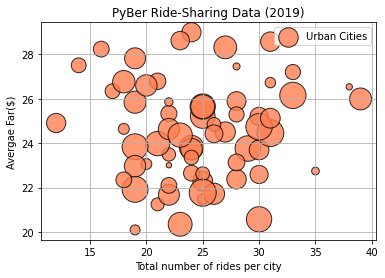

In [21]:
#Scatter plot for Urban type of cities
#plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,urban_average_fare, s=10 * urban_average_drivers, color="coral", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Urban Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

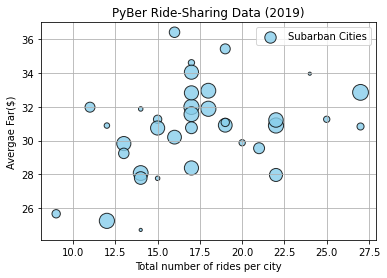

In [22]:
#Scatter plot for Subarban type of cities

plt.scatter(subarban_ride_count,subarban_average_fare, s=10*subarban_average_drivers, color="skyblue", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Subarban Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

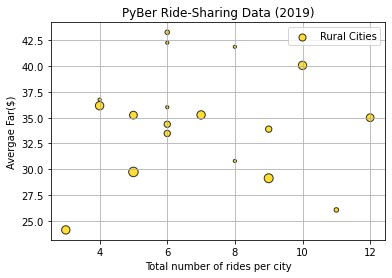

In [23]:
#Scatter plot for Rural type of cities

plt.scatter(rural_ride_count,rural_average_fare, s=10*rural_average_drivers, color="gold", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Rural Cities")

plt.xlabel("Total number of rides per city")
plt.ylabel("Avergae Far($)")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)
plt.legend()

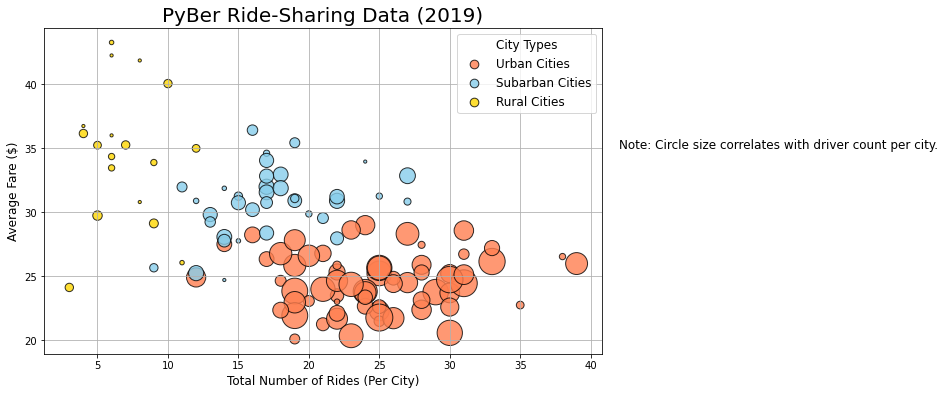

<Figure size 432x288 with 0 Axes>

In [39]:
#Scatter plot for Urban type of cities
#plt.subplots(figsize=(10, 6))
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count,urban_average_fare, s=10 * urban_average_drivers, color="coral", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Urban Cities")


#Scatter plot for Subarban type of cities
plt.scatter(subarban_ride_count,subarban_average_fare, s=10*subarban_average_drivers, color="skyblue", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Subarban Cities")




#Scatter plot for Rural type of cities
plt.scatter(rural_ride_count,rural_average_fare, s=10*rural_average_drivers, color="gold", edgecolor="black", 
            alpha=0.8, linewidths=1, label="Rural Cities")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

#Create a legend
lgnd=plt.legend(fontsize="12",mode="Expanded",scatterpoints=1, loc="best",title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()

# Save the figure.
plt.savefig("analysis\Fig1.png")
